In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv('/content/drive/MyDrive/Deep Learning/loan (1).csv',low_memory=False)
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(39717, 111)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## **Exploratory Data Analysis**

In [5]:
data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
loan=data

In [7]:
loan.isna().sum()/len(loan.index)*100 #missing value Proportion

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [8]:
#columns with more than 90 % missing value
missing_cols=loan.columns[loan.isna().sum()/len(loan.index)*100 >90]

In [9]:
len(missing_cols)

56

In [10]:
loan=loan.drop(missing_cols,axis=1)

In [11]:
loan.shape

(39717, 55)

In [12]:
loan.isna().sum()/len(loan.index)*100 

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [13]:
loan=loan.drop(['desc','mths_since_last_delinq'],axis=1)# droping these columns since they have missing value proportion more than 30 percentage

In [14]:
# checking for missing values again
loan.isna().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [15]:
#getting missing value proportion
loan.isna().sum()/len(loan.index)*100 

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [16]:
# cleaning int_rate column
loan['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [17]:
#removing percentage sign and converting to numeric column
loan['int_rate']=loan['int_rate'].str.replace("%","").astype(float)

In [18]:
#removing percentage sign and converting to numeric column
loan['revol_util']=loan['revol_util'].str.replace("%","").astype(float)

In [19]:
loan['emp_length'] # cleaning the column

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [20]:
#since emp_length has 1075 we drop the null values in emp_length
loan=loan[~loan['emp_length'].isnull()] #getting rows where emp_length is  not null value

In [21]:
#convertin emp_length to numeric
import re

In [22]:
loan['emp_length']=loan['emp_length'].apply(lambda x:re.findall('\d+',str(x))[0]).astype(int)

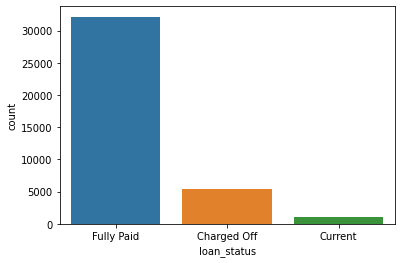

In [23]:
sns.countplot(x='loan_status',data=loan)

In [24]:
loan['loan_status'].value_counts() #getting value_counts of target variable

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [25]:
#consider only "Fully Paid" and "Charged Off"
loan=loan[loan['loan_status']!='Current']
loan['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [26]:
# removing nan value and filling with mean
loan['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [27]:
loan['pub_rec_bankruptcies'].mode()

0    0.0
dtype: float64

In [28]:
loan['pub_rec_bankruptcies']=loan['pub_rec_bankruptcies'].fillna(0.0)

In [29]:
loan['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

# Feature Engineering

In [30]:
from datetime import datetime
loan['issue_d']=loan['issue_d'].apply(lambda x:datetime.strptime(x,'%b-%y'))

In [31]:
loan['issue_d_month']=loan['issue_d'].apply(lambda x:x.month) #extracting month

In [32]:
loan['issue_d_year']=loan['issue_d'].apply(lambda x:x.year) #extracting year

In [33]:
# loan['pymnt_plan'] not needed since it has only one value and no info will be provided
# loan['earliest_cr_line'] not needed
#loan['initial_list_status']  not needed since it has only one value and no info will be provided
#loan['out_prncp_inv'] not needed since it has only one value and no info will be provided
#loan['collections_12_mths_ex_med'] not needed since it has only 0 value and null value  and no info will be provided
#loan['policy_code'] not needed since it has only one value and no info will be provided
# loan['application_type'] not needed since it has only one value and no info will be provided
#loan['acc_now_delinq']not needed since it has only one value and no info will be provided 
#loan['delinq_amnt']not needed since it has only one value and no info will be provided 
#loan['tax_liens'] not needed since it has only one value and no info will be provided 

In [34]:
#loan['last_pymnt_d_month']=loan['last_pymnt_d'].apply(lambda x:x.month)

In [35]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'issue_d_month', 'issue_d_year'],
      dtype='object')

In [36]:
req_cols=['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens', 'issue_d_month', 'issue_d_year','loan_status']

In [37]:
loan[req_cols]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,issue_d_month,issue_d_year,loan_status
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,0.00,0.00,0.00,171.62,0.0,0.0,0.0,12,2011,Fully Paid
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,...,0.00,117.08,1.11,119.66,0.0,0.0,0.0,12,2011,Charged Off
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,0.00,0.00,0.00,649.91,0.0,0.0,0.0,12,2011,Fully Paid
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,16.97,0.00,0.00,357.48,0.0,0.0,0.0,12,2011,Fully Paid
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,0.00,0.00,0.00,161.03,0.0,0.0,0.0,12,2011,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4,MORTGAGE,...,0.00,0.00,0.00,80.90,NaN,0.0,NaN,7,2007,Fully Paid
39713,8500,8500,875.0,36 months,10.28,275.38,C,C1,3,RENT,...,0.00,0.00,0.00,281.94,NaN,0.0,NaN,7,2007,Fully Paid
39714,5000,5000,1325.0,36 months,8.07,156.84,A,A4,1,MORTGAGE,...,0.00,0.00,0.00,0.00,NaN,0.0,NaN,7,2007,Fully Paid
39715,5000,5000,650.0,36 months,7.43,155.38,A,A2,1,MORTGAGE,...,0.00,0.00,0.00,0.00,NaN,0.0,NaN,7,2007,Fully Paid


In [38]:

loan[req_cols].to_csv("loan-processed.csv",index=False)

In [39]:
new_data = pd.read_csv("loan-processed.csv")

In [40]:
new_data.isna().sum()

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
purpose                      0
dti                          0
delinq_2yrs                  0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  47
total_acc                    0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_rec_int                0
total_rec_late_fee           0
recoveries                   0
collection_recovery_fee      0
last_pymnt_amnt              0
chargeoff_within_12_mths    56
pub_rec_bankruptcies         0
tax_liens                   39
issue_d_

In [41]:
new_data.shape

(37544, 35)

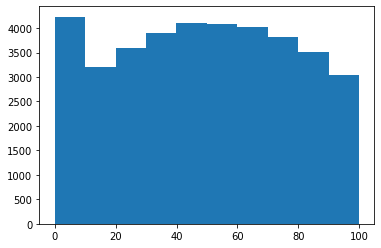

In [42]:
plt.hist(new_data['revol_util'])
plt.show()

In [43]:
median_ru = new_data['revol_util'].median()
new_data['revol_util'] = new_data['revol_util'].fillna(median_ru)

In [44]:
new_data = new_data.drop("chargeoff_within_12_mths",axis=1)

In [45]:
new_data = new_data.drop("tax_liens",axis=1) # since the columne has only 0 and nan value we can drop it

In [46]:
new_data.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
pub_rec_bankruptcies       0
issue_d_month              0
issue_d_year               0
loan_status                0
dtype: int64

In [47]:
new_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [48]:
new_data["term"] = new_data['term'].map({' 36 months':36,' 60 months':60})

In [49]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37544 entries, 0 to 37543
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  int64  
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  object 
 7   sub_grade                37544 non-null  object 
 8   emp_length               37544 non-null  int64  
 9   home_ownership           37544 non-null  object 
 10  annual_inc               37544 non-null  float64
 11  verification_status      37544 non-null  object 
 12  purpose                  37544 non-null  object 
 13  dti                      37544 non-null  float64
 14  delinq_2yrs           

In [50]:
new_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [51]:
#mapping new_data['loan_status'] to 0 and 1
new_data['loan_repaid'] = new_data['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [52]:
new_data[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,0,Charged Off
2,1,Fully Paid
3,1,Fully Paid
4,1,Fully Paid
...,...,...
37539,1,Fully Paid
37540,1,Fully Paid
37541,1,Fully Paid
37542,1,Fully Paid


In [53]:
new_data['loan_status']=new_data['loan_repaid']

In [54]:
new_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [55]:
#label encoding grade column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data["grade"] = le.fit_transform(new_data['grade'])

In [56]:
new_data['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [57]:
new_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [58]:
new_data['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [59]:
new_data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [60]:
new_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'issue_d_month', 'issue_d_year', 'loan_status', 'loan_repaid'],
      dtype='object')

In [61]:
#new_data.select_dtypes(['object']).columns

In [62]:
# Converting 'sub_grade' columns into dummy variables and concatenate with the original dataframe. set drop_first=True to drop the original columns.
subgrade = pd.get_dummies(new_data['sub_grade'],drop_first=True)

In [63]:
new_data = pd.concat([new_data.drop('sub_grade',axis=1),subgrade],axis=1)

In [64]:
new_data.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'purpose'], dtype='object')

In [65]:
# Converting below columns into dummy variables and concatenate with the original dataframe. set drop_first=True to drop the original columns.
dummies = pd.get_dummies(new_data[['verification_status','purpose' ]],drop_first=True)
new_data= new_data.drop(['verification_status','purpose'],axis=1)
new_data = pd.concat([new_data,dummies],axis=1)

In [66]:
#replacing None in home_ownership into other 
new_data['home_ownership']=new_data['home_ownership'].replace(['NONE'], 'OTHER')
dummies = pd.get_dummies(new_data['home_ownership'],drop_first=True)
new_data= new_data.drop('home_ownership',axis=1)
new_data = pd.concat([new_data,dummies],axis=1)

In [67]:
new_data.shape

(37544, 82)

In [68]:
new_data.select_dtypes(['object']).columns

Index([], dtype='object')

In [69]:
#new_data = new_data.drop('loan_status',axis=1)

## dependent features into y

In [70]:
x = new_data.drop('loan_status',axis=1).values
y = new_data['loan_status'].values

## Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
# if not scaled use scaling
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

## Splitting into train and test 

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# devide the dataset into traning and testing 
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=34)

## Model Bulding

In [92]:
from sklearn.metrics import accuracy_score

knn model

In [93]:
## knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.9464642429085098

SVM Model

In [94]:
### svm
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
accuracy_score(y_test, y_pred)

0.9985350912238647

## Model using Tensorflow

In [95]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import models

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [97]:
print(x_train.shape,y_train.shape)

(30035, 81) (30035,)


## Model 1

In [98]:
#input-81, hidden1- 32, output-1

In [99]:
model1 = models.Sequential()
model1.add(layers.Dense(32, input_shape = (81,),activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                2624      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,657
Trainable params: 2,657
Non-trainable params: 0
_________________________________________________________________


In [100]:
# Compile model
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [101]:
# Train your model for 20 epochs
model1.fit(x_train, y_train, epochs=20)

# Evaluate your model accuracy on the test set
accuracy = model1.evaluate(x_test, y_test)

# Print accuracy
print('Accuracy:',accuracy)

Epoch 1/20
939/939 [==============================] - 3s 2ms/step - loss: 0.0931
Epoch 2/20
939/939 [==============================] - 2s 2ms/step - loss: 0.0028
Epoch 3/20
939/939 [==============================] - 3s 3ms/step - loss: 6.8908e-04
Epoch 4/20
939/939 [==============================] - 2s 2ms/step - loss: 2.7186e-04
Epoch 5/20
939/939 [==============================] - 2s 2ms/step - loss: 1.2821e-04
Epoch 6/20
939/939 [==============================] - 2s 2ms/step - loss: 6.6765e-05
Epoch 7/20
939/939 [==============================] - 2s 2ms/step - loss: 3.6244e-05
Epoch 8/20
939/939 [==============================] - 2s 2ms/step - loss: 2.0356e-05
Epoch 9/20
939/939 [==============================] - 2s 2ms/step - loss: 1.1667e-05
Epoch 10/20
939/939 [==============================] - 2s 2ms/step - loss: 6.8039e-06
Epoch 11/20
939/939 [==============================] - 2s 2ms/step - loss: 3.9699e-06
Epoch 12/20
939/939 [==============================] - 2s 2ms/step - lo

## Model 2

In [102]:
# model 2
model2 = models.Sequential()
model2.add(layers.Dense(256, input_shape = (81,),activation='relu'))
model2.add(layers.Dense(128,activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

# Compile your model with your optimizer, loss, and metrics
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display a summary of your model
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               20992     
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 54,017
Trainable params: 54,017
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Train your model for 20 epochs
model2.fit(x_train, y_train, epochs=20)

# Evaluate your model accuracy on the test set
accuracy = model2.evaluate(x_test, y_test)[1]

# Print accuracy
print('Accuracy:',accuracy)

Epoch 1/20
939/939 [==============================] - 3s 3ms/step - loss: 0.0190 - accuracy: 0.9953
Epoch 2/20
939/939 [==============================] - 3s 3ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 3/20
939/939 [==============================] - 3s 3ms/step - loss: 1.1390e-05 - accuracy: 1.0000
Epoch 4/20
939/939 [==============================] - 3s 3ms/step - loss: 5.5722e-06 - accuracy: 1.0000
Epoch 5/20
939/939 [==============================] - 3s 3ms/step - loss: 3.1949e-06 - accuracy: 1.0000
Epoch 6/20
939/939 [==============================] - 3s 3ms/step - loss: 1.9020e-06 - accuracy: 1.0000
Epoch 7/20
939/939 [==============================] - 3s 3ms/step - loss: 1.1482e-06 - accuracy: 1.0000
Epoch 8/20
939/939 [==============================] - 3s 3ms/step - loss: 6.9892e-07 - accuracy: 1.0000
Epoch 9/20
939/939 [==============================] - 3s 3ms/step - loss: 4.2417e-07 - accuracy: 1.0000
Epoch 10/20
939/939 [==============================] - 3s 3ms/step - los

In [104]:
y_pred = model2.predict(x_test)

235/235 [==============================] - 0s 1ms/step


In [105]:
model2.evaluate(x_test,y_test)

235/235 [==============================] - 1s 2ms/step - loss: 1.1241e-04 - accuracy: 0.9999


[0.00011241011088714004, 0.9998668432235718]

In [86]:
model1.evaluate(x_test,y_test)

235/235 [==============================] - 0s 2ms/step - loss: 4.8232e-05


4.8232468543574214e-05

## Evaluating Model Performance

In [106]:
history1 = model2.fit(x_train , y_train , epochs = 20, batch_size = 64,
           validation_split = 0.1)

Epoch 1/20
423/423 [==============================] - 1s 3ms/step - loss: 3.2146e-09 - accuracy: 1.0000 - val_loss: 3.1529e-09 - val_accuracy: 1.0000
Epoch 2/20
423/423 [==============================] - 1s 3ms/step - loss: 2.9149e-09 - accuracy: 1.0000 - val_loss: 2.8647e-09 - val_accuracy: 1.0000
Epoch 3/20
423/423 [==============================] - 1s 3ms/step - loss: 2.6167e-09 - accuracy: 1.0000 - val_loss: 2.6131e-09 - val_accuracy: 1.0000
Epoch 4/20
423/423 [==============================] - 1s 3ms/step - loss: 2.3824e-09 - accuracy: 1.0000 - val_loss: 2.4031e-09 - val_accuracy: 1.0000
Epoch 5/20
423/423 [==============================] - 1s 3ms/step - loss: 2.1854e-09 - accuracy: 1.0000 - val_loss: 2.2093e-09 - val_accuracy: 1.0000
Epoch 6/20
423/423 [==============================] - 1s 3ms/step - loss: 2.0143e-09 - accuracy: 1.0000 - val_loss: 2.0443e-09 - val_accuracy: 1.0000
Epoch 7/20
423/423 [==============================] - 1s 3ms/step - loss: 1.8670e-09 - accuracy: 1.0

In [107]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

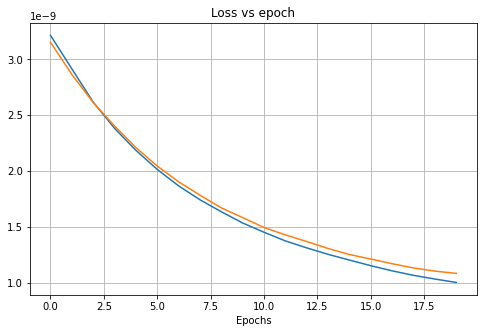

In [108]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(history1.history['loss'], label = "Training loss")
ax.plot(history1.history['val_loss'], label = "validation loss")
ax.set_title("Loss vs epoch")
ax.set_xlabel("Epochs")
ax.grid()
plt.show()

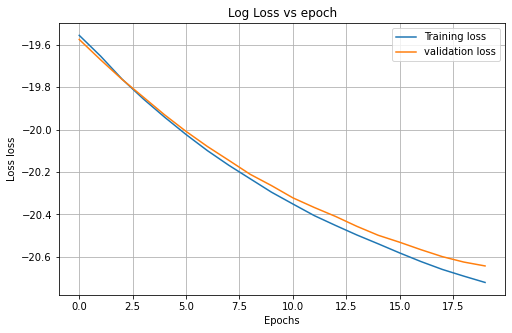

In [109]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.log(history1.history['loss']), label = "Training loss")
ax.plot(np.log(history1.history['val_loss']), label = "validation loss")
ax.set_title("Log Loss vs epoch")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss loss")
ax.legend()
ax.grid()
plt.show()